In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [52]:
dfwine = pd.read_csv('/content/WineQT.csv')
dfwine.head()

ID  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   0            7.4              0.70         0.00             1.9   
1   1            7.8              0.88         0.00             2.6   
2   2            7.8              0.76         0.04             2.3   
3   3           11.2              0.28         0.56             1.9   
4   4            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8        5  
3       0.58      9.8        6  
4       0.56      9.4        5

In [53]:
dfwine.shape

(1143, 13)

In [54]:
dfwine.head()

ID  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   0            7.4              0.70         0.00             1.9   
1   1            7.8              0.88         0.00             2.6   
2   2            7.8              0.76         0.04             2.3   
3   3           11.2              0.28         0.56             1.9   
4   4            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8        5  
3       0.58      9.8        6  
4       0.56      9.4        5

In [55]:
dfwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1143 non-null   int64  
 1   fixed acidity         1143 non-null   float64
 2   volatile acidity      1143 non-null   float64
 3   citric acid           1143 non-null   float64
 4   residual sugar        1143 non-null   float64
 5   chlorides             1143 non-null   float64
 6   free sulfur dioxide   1143 non-null   float64
 7   total sulfur dioxide  1143 non-null   float64
 8   density               1143 non-null   float64
 9   pH                    1143 non-null   float64
 10  sulphates             1143 non-null   float64
 11  alcohol               1143 non-null   float64
 12  quality               1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [56]:
dfwine.describe()

ID  fixed acidity  volatile acidity  citric acid  \
count  1143.000000    1143.000000       1143.000000  1143.000000   
mean    571.000000       8.311111          0.531339     0.268364   
std     330.099985       1.747595          0.179633     0.196686   
min       0.000000       4.600000          0.120000     0.000000   
25%     285.500000       7.100000          0.392500     0.090000   
50%     571.000000       7.900000          0.520000     0.250000   
75%     856.500000       9.100000          0.640000     0.420000   
max    1142.000000      15.900000          1.580000     1.000000   

       residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide  \
count     1143.000000  1143.000000          1143.000000           1143.000000   
mean         2.532152     0.086933            15.615486             45.914698   
std          1.355917     0.047267            10.250486             32.782130   
min          0.900000     0.012000             1.000000              6.000000   
25%          1.900000     0.070000             7.000000             21.000000   
50%          2.200000     0.079000            13.000000             37.000000   
75%          2.600000     0.090000            21.000000             61.000000   
max         15.500000     0.611000            68.000000            289.000000   

           density           pH    sulphates      alcohol      quality  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      0.996730     3.311015     0.657708    10.442111     5.657043  
std       0.001925     0.156664     0.170399     1.082196     0.805824  
min       0.990070     2.740000     0.330000     8.400000     3.000000  
25%       0.995570     3.205000     0.550000     9.500000     5.000000  
50%       0.996680     3.310000     0.620000    10.200000     6.000000  
75%       0.997845     3.400000     0.730000    11.100000     6.000000  
max       1.003690     4.010000     2.000000    14.900000     8.000000

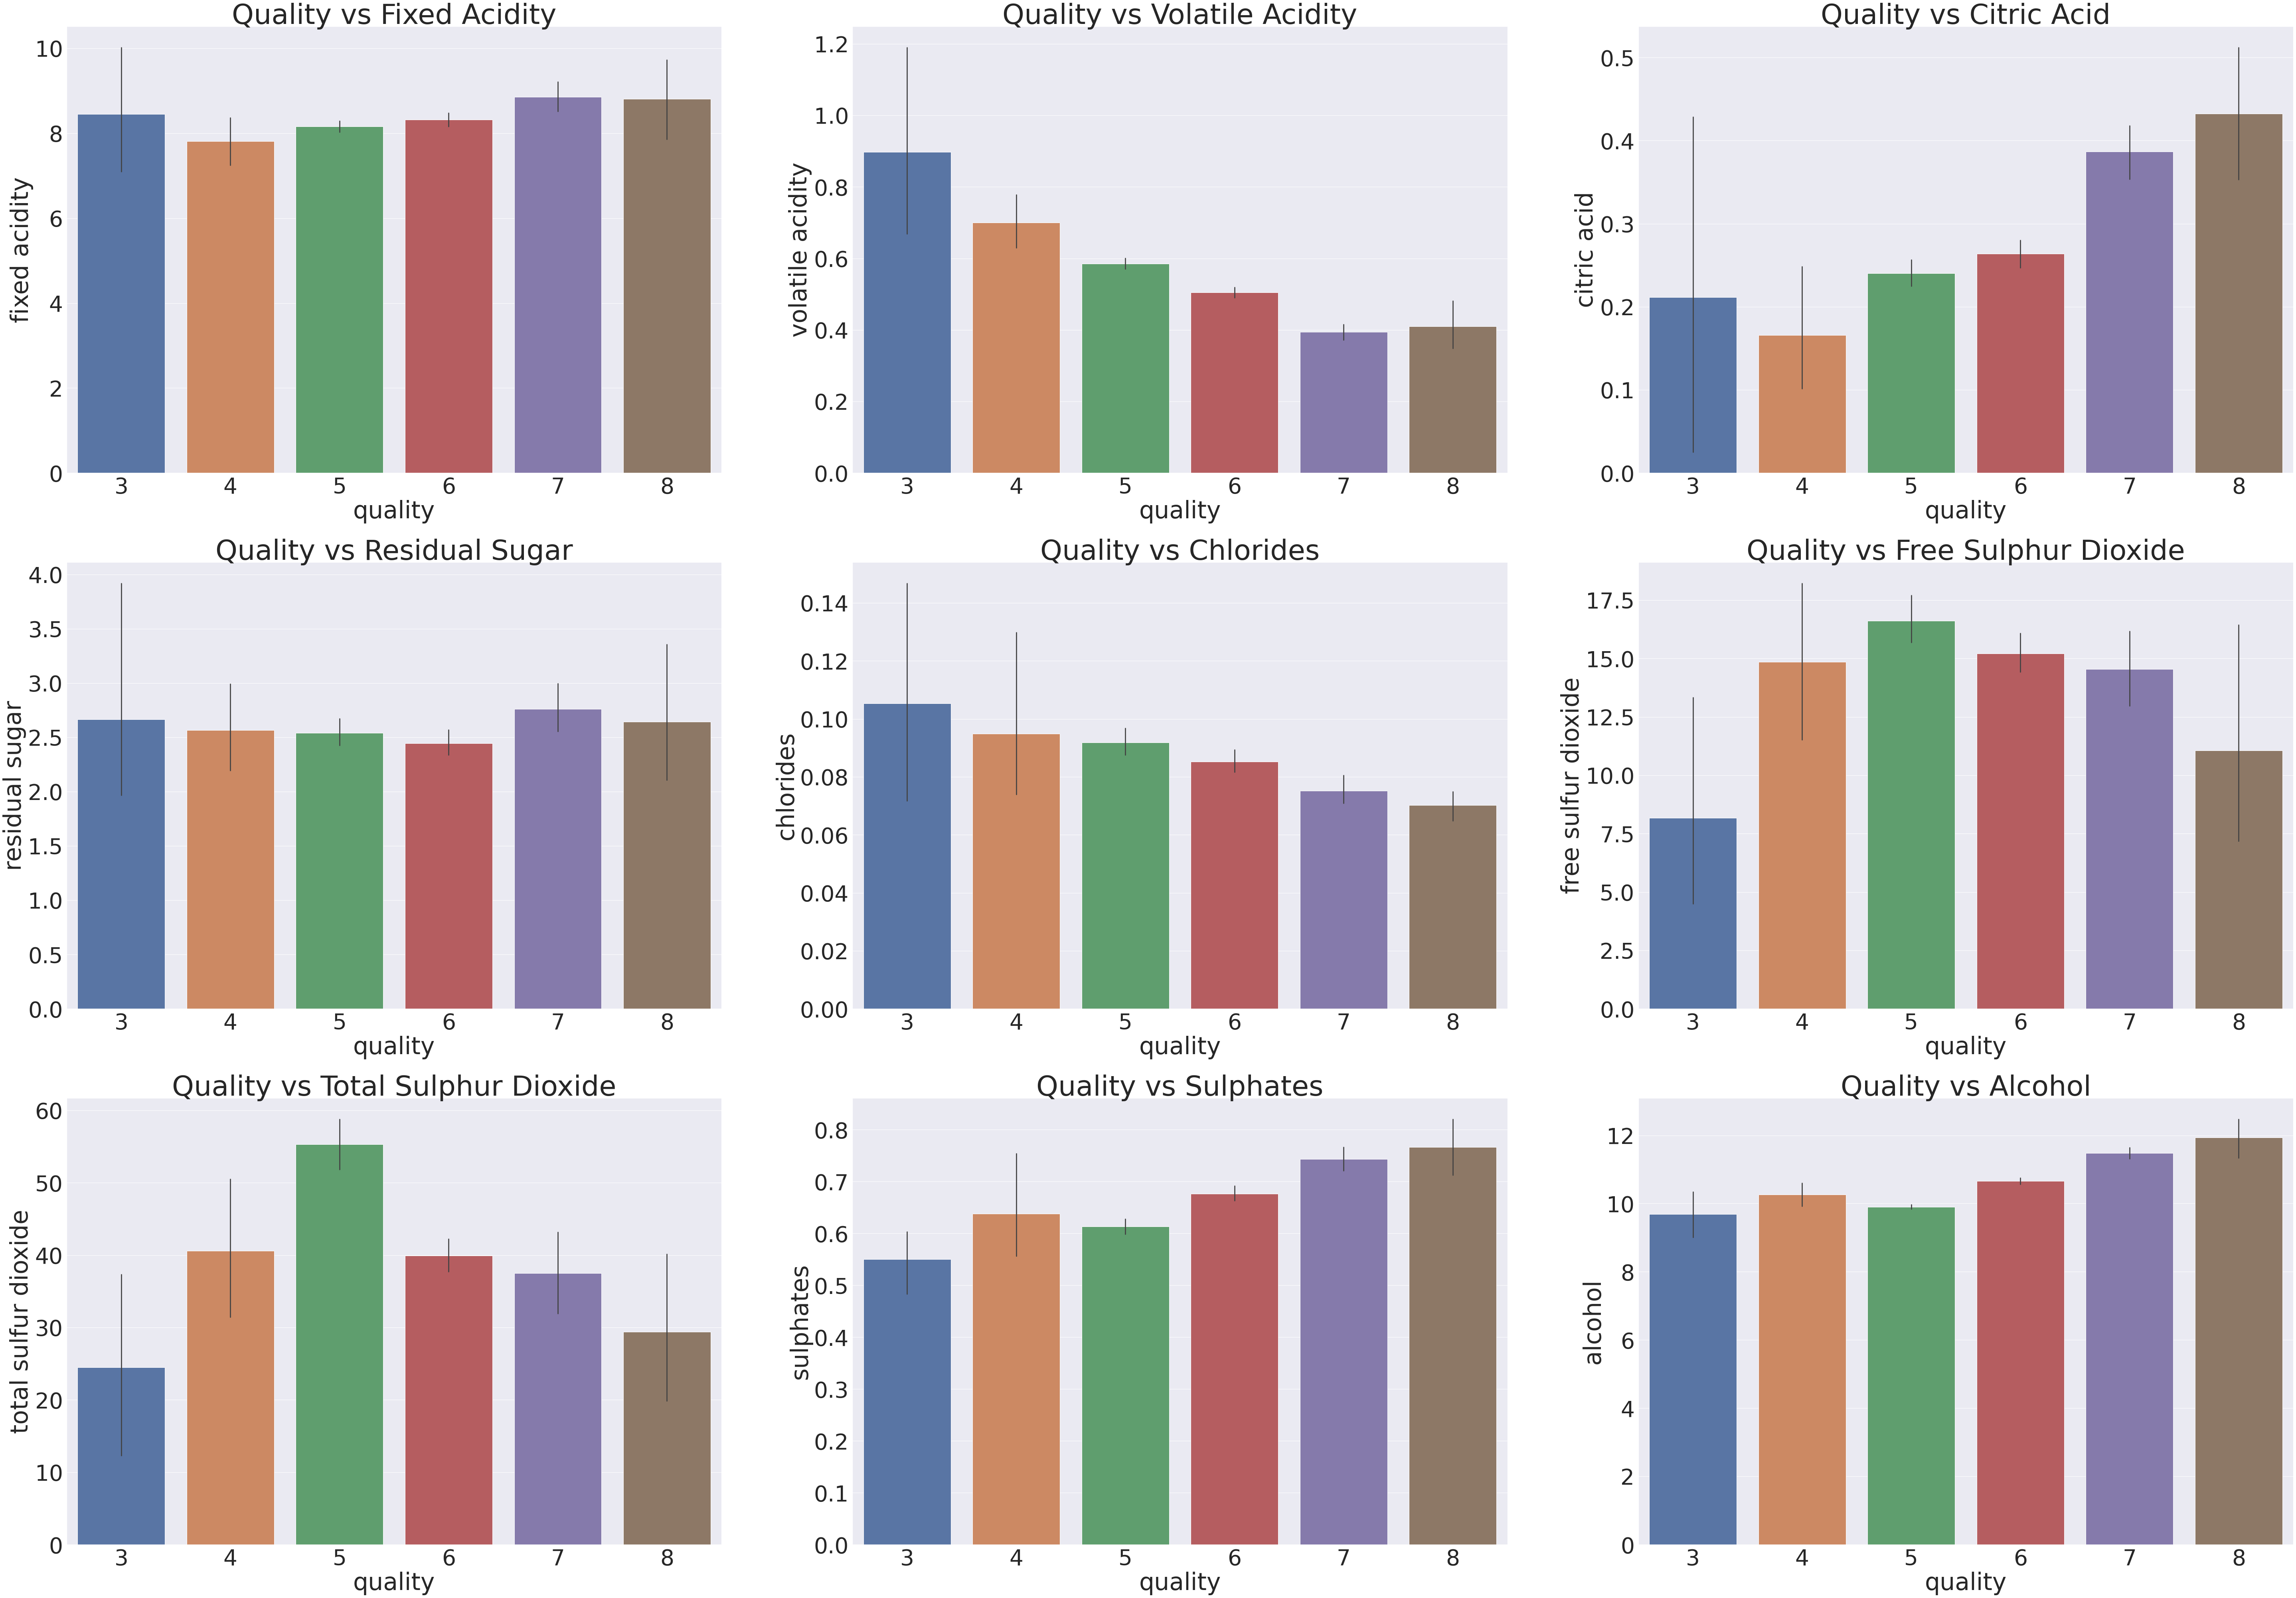

In [ ]:
plt.figure(figsize = (100,70))
sns.set(font_scale = 5)
plt.subplot(331)
plt.title("Quality vs Fixed Acidity",fontsize = 70)
sns.barplot(x = 'quality', y = 'fixed acidity', data = dfwine)

plt.subplot(332)
plt.title("Quality vs Volatile Acidity",fontsize = 70)
sns.barplot(x = 'quality', y = 'volatile acidity', data = dfwine)

plt.subplot(333)
plt.title("Quality vs Citric Acid",fontsize = 70)
sns.barplot(x = 'quality', y = 'citric acid', data = dfwine)

plt.subplot(334)
plt.title("Quality vs Residual Sugar",fontsize = 70)
sns.barplot(x = 'quality', y = 'residual sugar', data = dfwine)

plt.subplot(335)
plt.title("Quality vs Chlorides",fontsize = 70)
sns.barplot(x = 'quality', y = 'chlorides', data = dfwine)

plt.subplot(336)
plt.title("Quality vs Free Sulphur Dioxide",fontsize = 70)
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = dfwine)

plt.subplot(337)
plt.title("Quality vs Total Sulphur Dioxide",fontsize = 70)
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = dfwine)

plt.subplot(338)
plt.title("Quality vs Sulphates",fontsize = 70)
sns.barplot(x = 'quality', y = 'sulphates', data = dfwine)

plt.subplot(339)
plt.title("Quality vs Alcohol",fontsize = 70)
sns.barplot(x = 'quality', y = 'alcohol', data = dfwine)





<function matplotlib.pyplot.show>

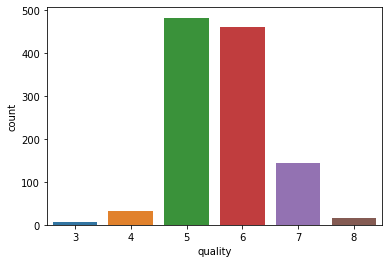

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(dfwine['quality'])
sns.set(font_scale= 1)
plt.show

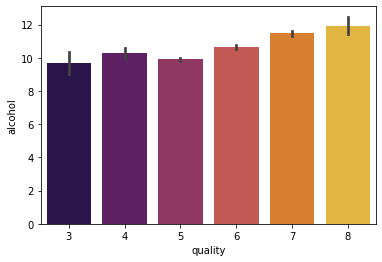

In [ ]:
plt.figure(figsize = (6,4))
sns.barplot(x='quality', y= 'alcohol', data=dfwine, palette ='inferno')
plt.show()

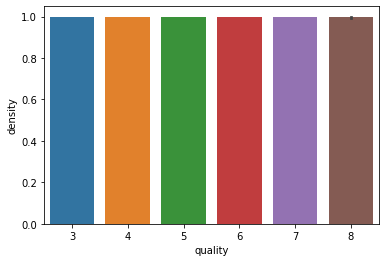

In [ ]:
plt.figure(figsize = (6,4))
sns.barplot(x='quality', y= 'density', data=dfwine)
plt.show()

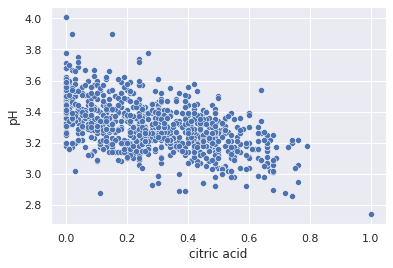

In [ ]:
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'citric acid', y = 'pH', data = dfwine)
sns.set(font_scale= 1)
plt.show()

<Figure size 864x432 with 0 Axes>

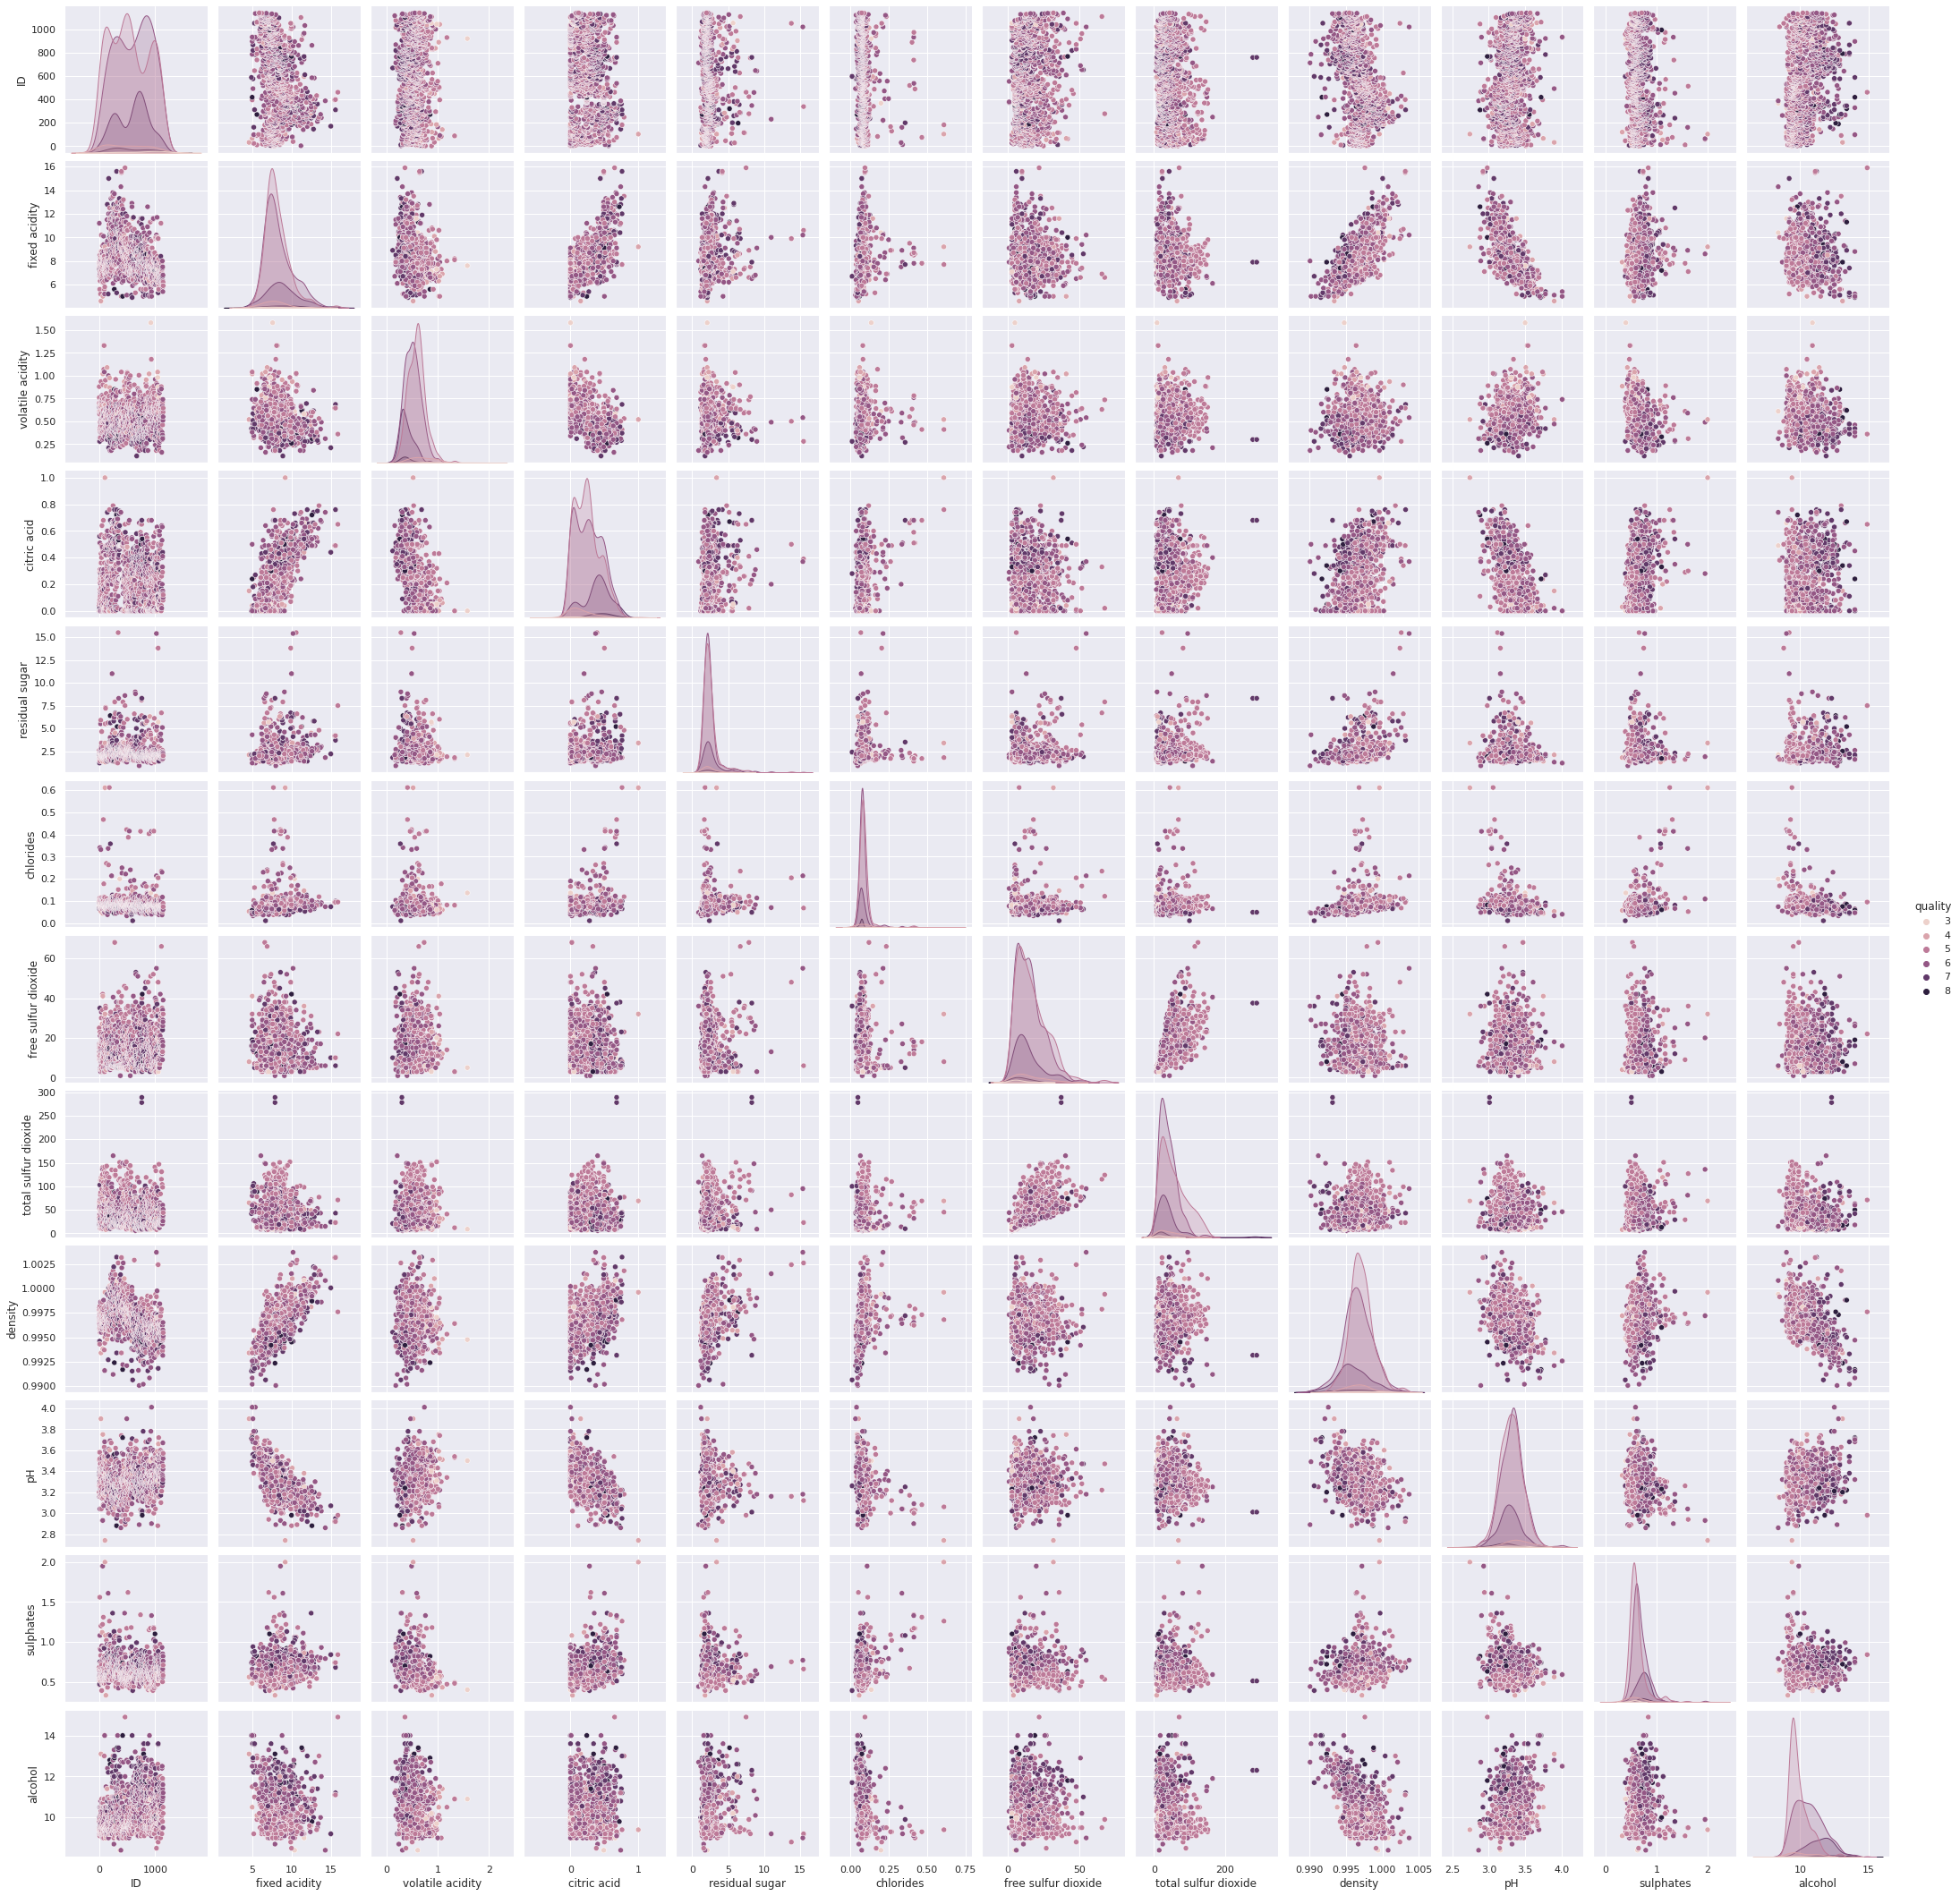

In [ ]:
plt.figure(figsize = (12,6))
sns.pairplot(dfwine, hue = 'quality')
sns.set(font_scale= 1)
plt.show()

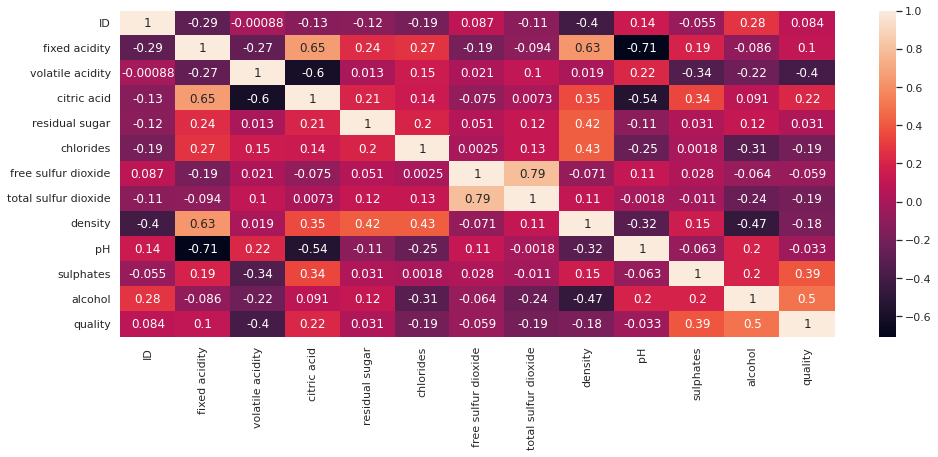

In [ ]:
plt.figure(figsize = (16,6))
sns.heatmap(dfwine.corr(method='spearman'), annot = True)
sns.set(font_scale= 1)
plt.show()

## ***DATA PRE-PROCESSING***

In [58]:
bins = (1,5,8)
classes = ['bad','good']


In [59]:
dfwine['quality'] = pd.cut(dfwine['quality'], bins = bins, labels = classes)

In [60]:
label_quality = LabelEncoder()

In [61]:
dfwine['quality'] = label_quality.fit_transform(dfwine['quality'])

In [62]:
dfwine['quality'].value_counts()

1    621
0    522
Name: quality, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

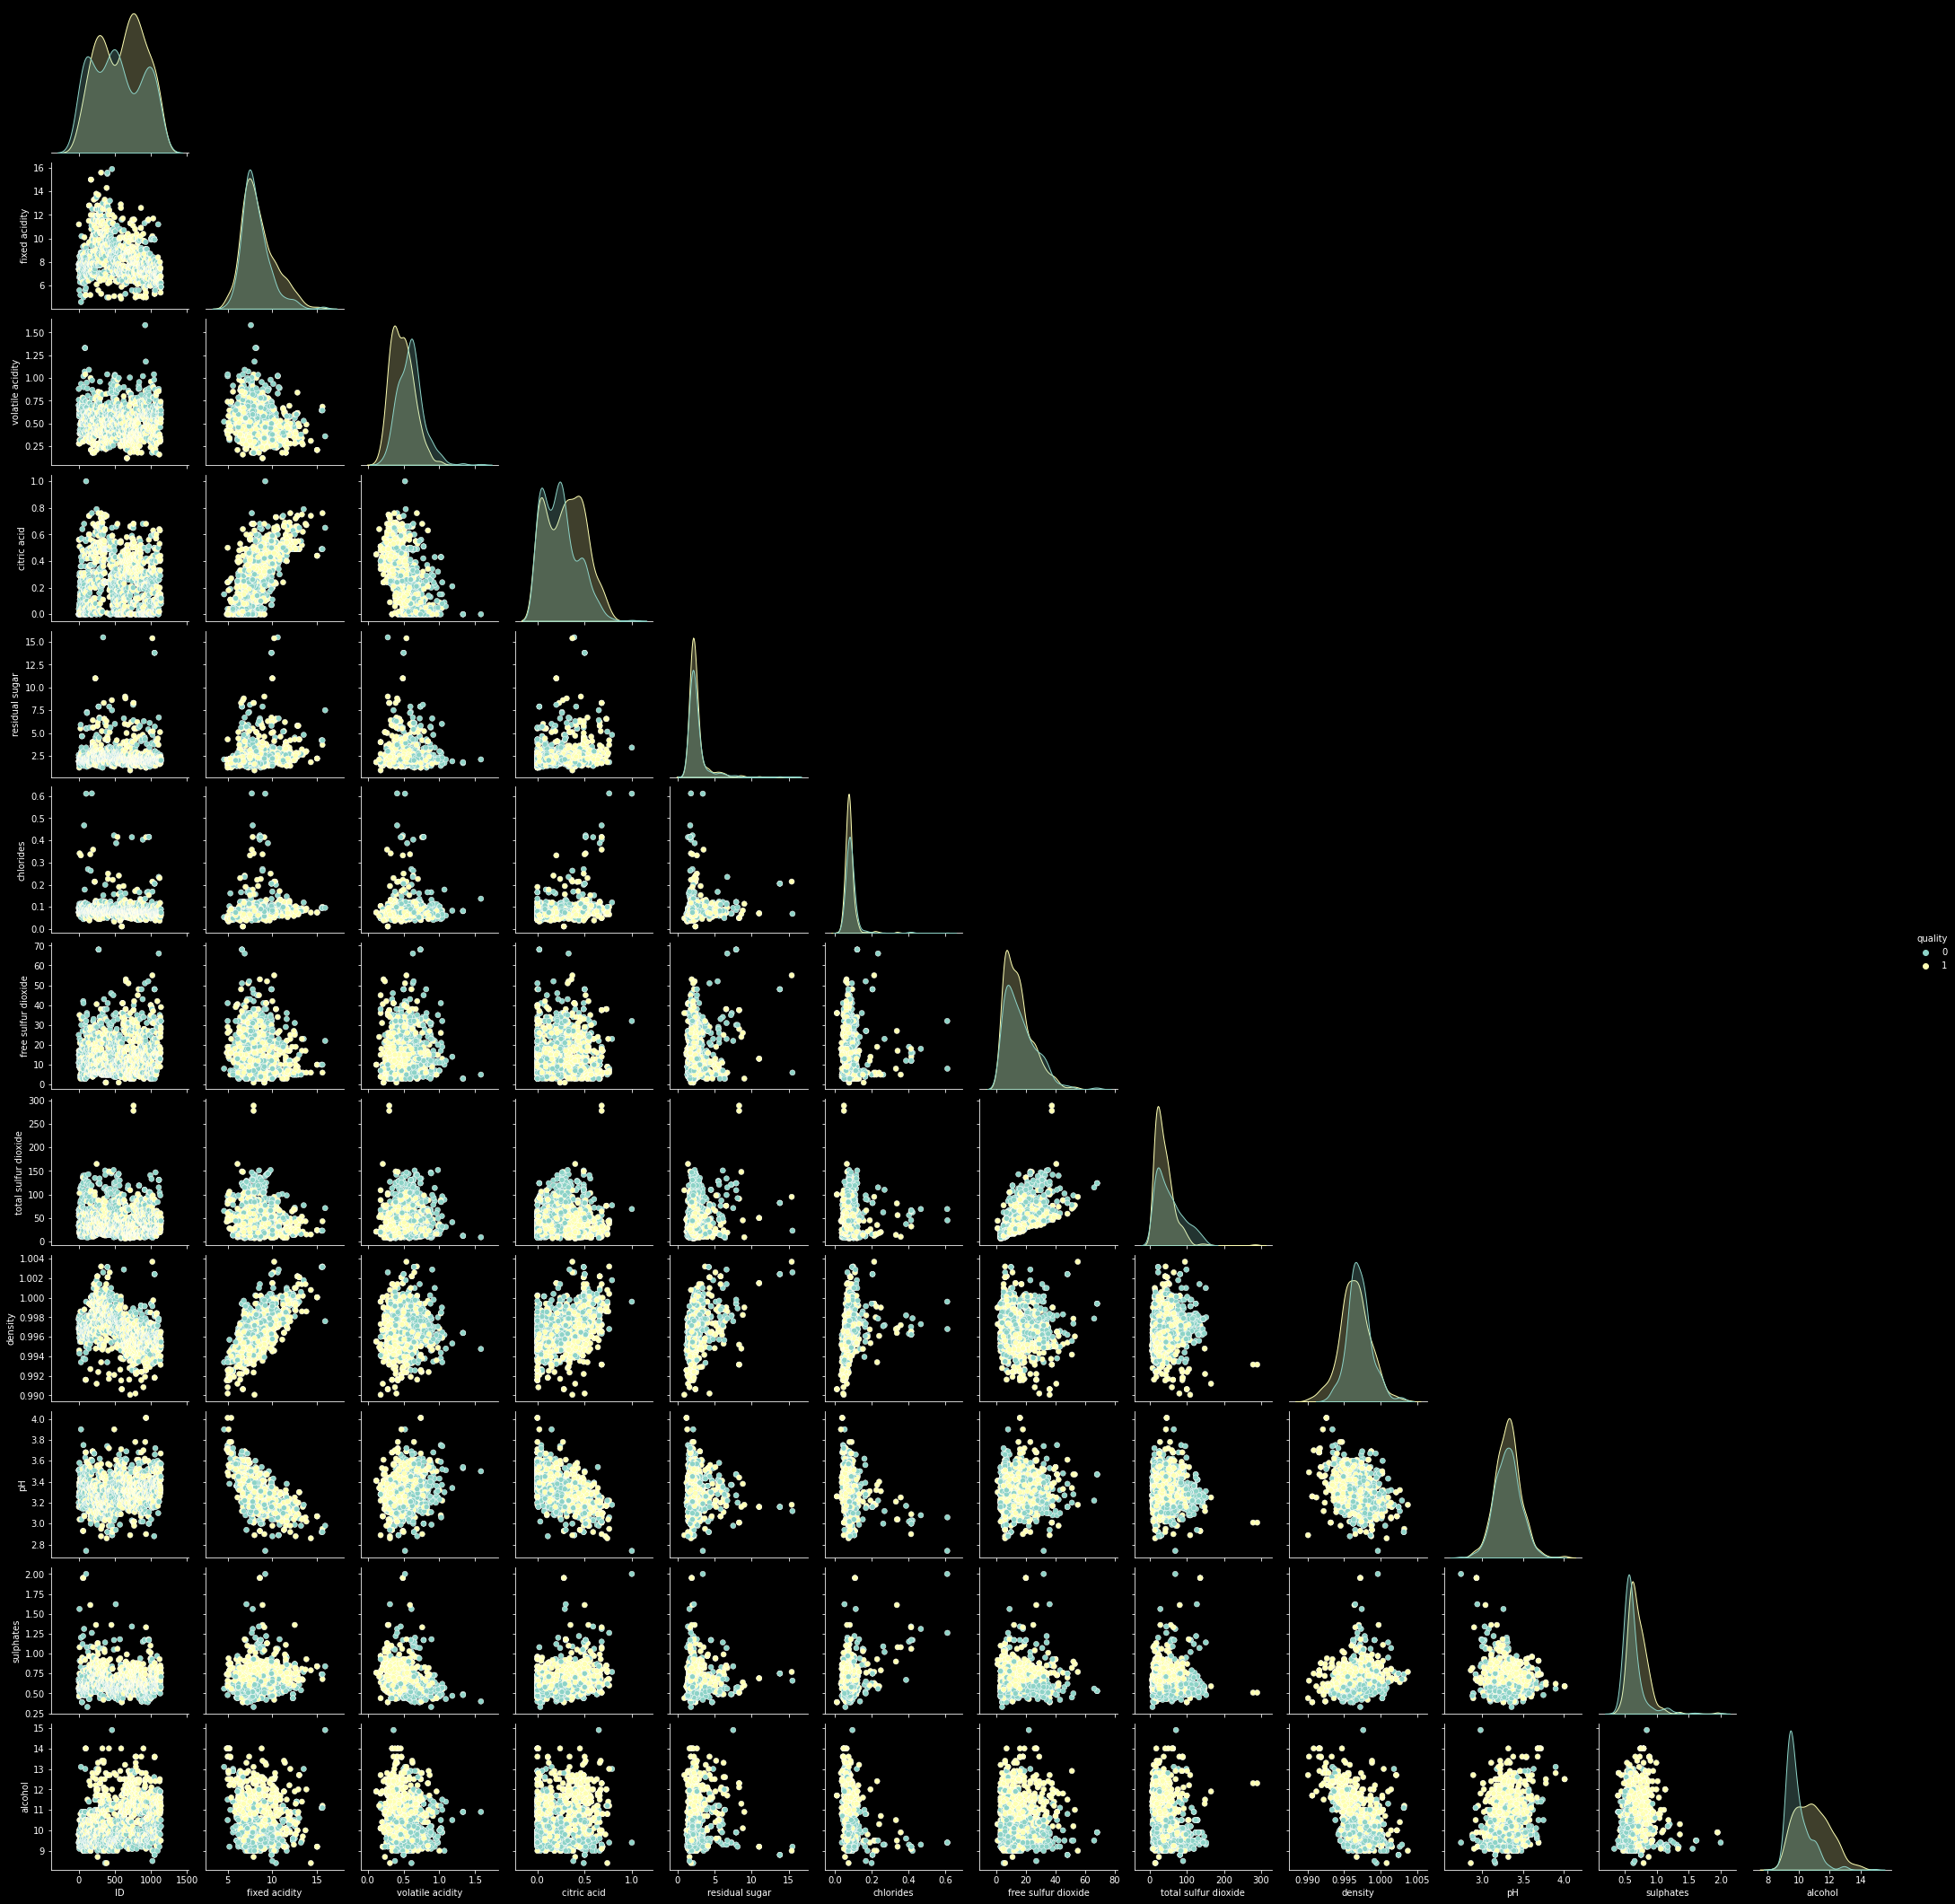

In [ ]:
sns.pairplot(dfwine, hue='quality', corner= True)


In [ ]:
dfwine.to_csv('wine.csv')

In [ ]:
# 0 = BAD and 1 = GOOD

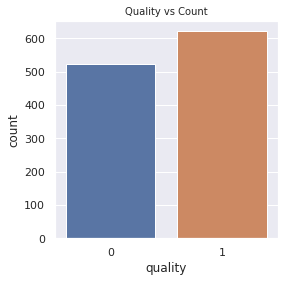

In [64]:
plt.figure(figsize=(4,4))
sns.set(font_scale = 1)
plt.title("Quality vs Count", fontsize = 10)
sns.countplot(dfwine['quality'])

In [65]:
dfwine.head()

ID  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   0            7.4              0.70         0.00             1.9   
1   1            7.8              0.88         0.00             2.6   
2   2            7.8              0.76         0.04             2.3   
3   3           11.2              0.28         0.56             1.9   
4   4            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        0  
1       0.68      9.8        0  
2       0.65      9.8        0  
3       0.58      9.8        1  
4       0.56      9.4        0

In [66]:
X = dfwine.drop('quality',axis = 1)
Y = dfwine['quality']

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [38]:
sc = StandardScaler() # X

In [39]:
X_train = sc.fit_transform(X_train) #X
X_test = sc.fit_transform(X_test)

# ***Prediction using Classification Algorithms***

---



# ***LOGISTIC REGRESSION***

In [22]:
lr = LogisticRegression().fit(X_train, Y_train)
pred_lr = lr.predict(X_test)


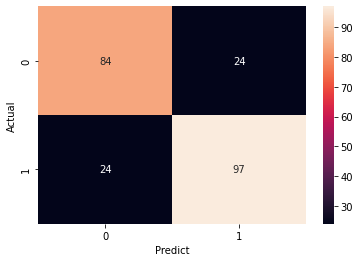

In [23]:
cm_lr = confusion_matrix(Y_test, pred_lr)
cm1 = sns.heatmap(cm_lr, annot = True)
cm1.set(xlabel='Predict', ylabel = 'Actual')
plt.show()

In [24]:
print(classification_report(Y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       108
           1       0.80      0.80      0.80       121

    accuracy                           0.79       229
   macro avg       0.79      0.79      0.79       229
weighted avg       0.79      0.79      0.79       229



In [34]:
accuracy_lr = accuracy_score(Y_test, pred_lr)
print("Logistic Regression Accuracy Score: ", accuracy_lr*100)

Logistic Regression Accuracy Score:  79.03930131004367


## ***RANDOM FOREST CLASSIFIER***

In [26]:
rf = RandomForestClassifier(n_estimators= 143, min_samples_split=5, min_samples_leaf = 1, max_features = "log2",max_depth = 20, criterion = "gini")
rf.fit(X_train, Y_train)
pred_rf = rf.predict(X_test)

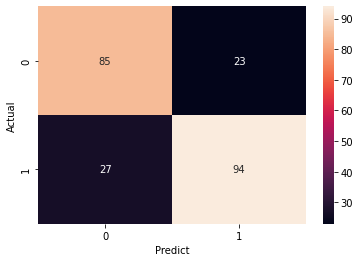

In [27]:
cm_rf = confusion_matrix(Y_test, pred_rf)
cm2 = sns.heatmap(cm_rf, annot = True)
cm2.set(xlabel='Predict', ylabel = 'Actual')
plt.show()

In [28]:
print(classification_report(Y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       108
           1       0.80      0.78      0.79       121

    accuracy                           0.78       229
   macro avg       0.78      0.78      0.78       229
weighted avg       0.78      0.78      0.78       229



In [33]:
accuracy_rf = accuracy_score(Y_test, pred_rf)
print("Random Forest Classifier Accuracy Score: ", accuracy_rf*100)

Random Forest Classifier Accuracy Score:  78.16593886462883


# ***DECISION TREE***

In [72]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
pred_dt = dt.predict(X_test)


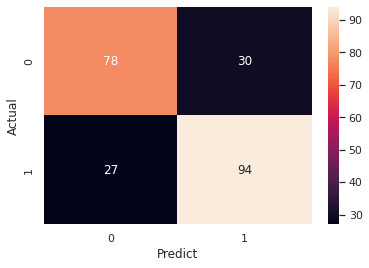

In [73]:
cm_dt = confusion_matrix(Y_test, pred_dt)
cm3 = sns.heatmap(cm_dt, annot = True)
cm3.set(xlabel='Predict', ylabel = 'Actual')
plt.show()

In [75]:
print(classification_report(Y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       108
           1       0.76      0.78      0.77       121

    accuracy                           0.75       229
   macro avg       0.75      0.75      0.75       229
weighted avg       0.75      0.75      0.75       229



In [74]:
accuracy_dt = accuracy_score(Y_test, pred_dt)
print("Decision Tree Accuracy Score: ", accuracy_dt*100)

Decision Tree Accuracy Score:  75.10917030567686


# ***XG BOOST***

In [17]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train, Y_train)
pred_xg = xgb.predict(X_test)

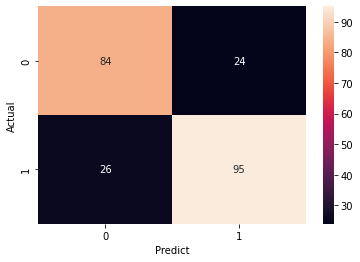

In [35]:
cm_xg = confusion_matrix(Y_test, pred_xg)
cm4 = sns.heatmap(cm_xg, annot = True)
cm4.set(xlabel='Predict', ylabel = 'Actual')
plt.show()

In [36]:
print(classification_report(Y_test,pred_xg))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       108
           1       0.80      0.79      0.79       121

    accuracy                           0.78       229
   macro avg       0.78      0.78      0.78       229
weighted avg       0.78      0.78      0.78       229



In [37]:
accuracy_xg = accuracy_score(Y_test, pred_xg)
print("XG Boost Accuracy Score: ", accuracy_xg*100)

XG Boost Accuracy Score:  78.16593886462883
